In [2]:
import astropy
import photutils
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
from math import log
from scipy.ndimage import gaussian_filter

SPIRAL_DIR = "/Users/aarushgupta/Desktop/aarushg/20241002_P2/NGC6946_P2"
SPIRAL_PFX = "P2_NGC 6946"
ELLIPTICAL_DIR = "/Users/aarushgupta/Desktop/aarushg/20241002_P2/NGC7265_P2"
filters = ["r'", "g'", "i'"]
background_bounds = (1920, 2000, 3530, 3600)

In [3]:
filter_mean_images = dict()
filter_mean_stds = dict()

for filter in filters:

    # print(os.listdir(SPIRAL_DIR))

    FILE_PATH_PFX = SPIRAL_DIR + "/" + SPIRAL_PFX + f"_{filter}_1x1_180.000secs"

    all_filenames = glob.glob(f"{FILE_PATH_PFX}*.fit")

    images = []

    for filename in all_filenames:
        data = astropy.io.fits.open(filename)[0].data
        h_t, h_b, w_t, w_b = background_bounds
        background = np.median(data[h_t:h_b, w_t:w_b])
        images.append(np.maximum(data - background, 0))
        images.append(data)
    
    means = np.mean(images, axis=0)
    stds = np.std(images, axis=0)

    filter_mean_images[filter] = means

    # plt.imshow(np.log(means + 1), vmax=8)
    

In [4]:
x_offset = 30
y_offset = -25

shifted_g_image = filter_mean_images["g'"][100 + y_offset : -100, 100 + x_offset : -100]
shifted_r_image = filter_mean_images["r'"][100 : -100-y_offset , 100 : -100-x_offset]

print(shifted_g_image.shape)
print(shifted_r_image.shape)


(4001, 6022)
(4001, 6022)


In [49]:
# Reference star TYC 4246-977-1

ref_mR = 10.6
ref_mG = 9.95

fluxR_obs = np.sum(shifted_r_image[3570:3625, 1975:2025])
fluxG_obs = np.sum(shifted_g_image[3570:3625, 1975:2025])

print(fluxR_obs)
print(fluxG_obs)

rg_filter_delta = -2.5 * (np.log(fluxG_obs) - np.log(fluxR_obs)) / np.log(10) - (ref_mG - ref_mR)

17188434.166666668
9209067.166666666


In [32]:
rg_filter_delta

np.float64(1.3275516864300414)

-8.089819778138105
-1.3589491245810683
5.4475010059388955


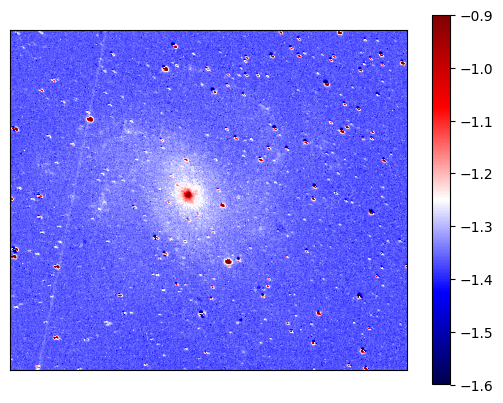

In [56]:
diff_image = -2.5 * (np.log(shifted_g_image) - np.log(shifted_r_image)) / np.log(10) - rg_filter_delta
# diff_image -= np.min(diff_image)
print(np.min(diff_image))
print(np.mean(diff_image))
print(np.max(diff_image))

zeroed_diff_image = diff_image * (gaussian_filter(shifted_r_image, sigma=5) > 0)

plt.imshow(zeroed_diff_image[500:3500, 0:3500], vmin=-1.6, vmax=-0.9, cmap="seismic")
plt.xticks([])
plt.yticks([])
plt.colorbar()

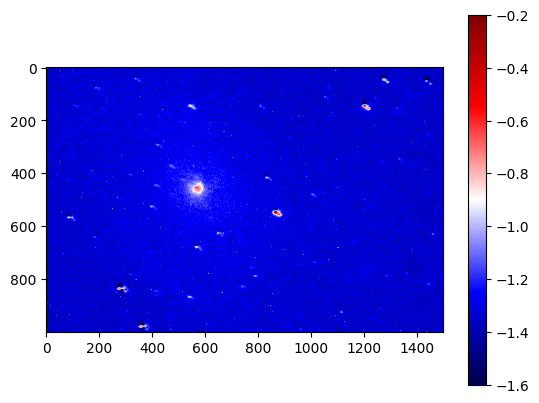

In [61]:
plt.imshow(zeroed_diff_image[1500:2500, 1000:2500], vmin=-1.6, vmax=-0.2, cmap="seismic")
plt.colorbar()

17188434.166666668


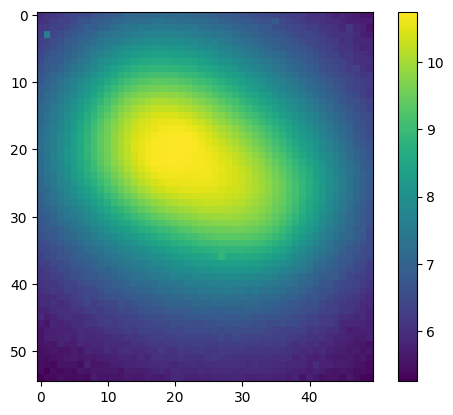

In [24]:
plt.imshow(np.log(shifted_r_image[3570:3625, 1975:2025]))
print(np.sum(shifted_r_image[3570:3625, 1975:2025]))
plt.colorbar()

9209067.166666666


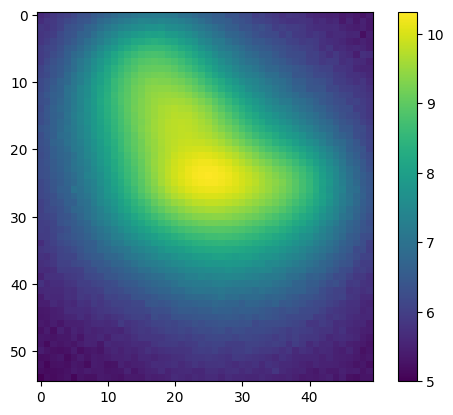

In [25]:
plt.imshow(np.log(shifted_g_image[3570:3625, 1975:2025]))
print(np.sum(shifted_g_image[3570:3625, 1975:2025]))
plt.colorbar()

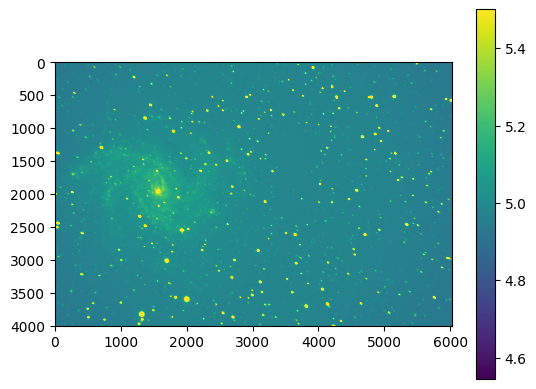

In [10]:
plt.imshow(np.log(shifted_r_image + 1e-6), vmax=5.5)
plt.colorbar()

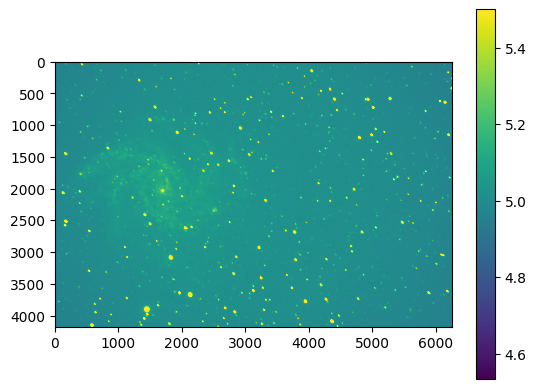

In [14]:
plt.imshow(np.log(filter_mean_images["g'"] + 1e-6), vmax=5.5)
plt.colorbar()

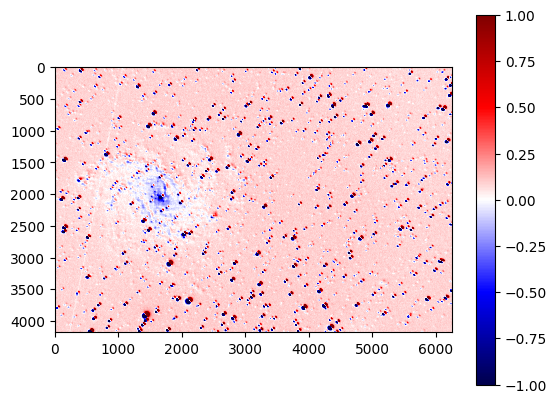

In [12]:

simple_diffs = -2.5 * (np.log(filter_mean_images["r'"] + 1e-6) - np.log(filter_mean_images["g'"] + 1e-6))

plt.imshow(simple_diffs, cmap="seismic", vmax=1, vmin=-1)
plt.colorbar()
